# Fun with JAX

**Prepared for the Bank of Portugal Computational Economics Course (Oct 2025)**

**Author:** [John Stachurski](https://johnstachurski.net)

October 2025

This is a super quick illustration of the power of [JAX](https://github.com/google/jax), a Python library built by Google Research.

It should be run on a machine with a GPU --- for example, try Google Colab with the runtime environment set to include a GPU.

The aim is just to give a small taste of high performance computing in Python -- details will be covered later in the course.

We start with some imports

In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'jax'

Let's check our hardware:

In [2]:
!nvidia-smi

Tue Oct  7 16:04:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.65.06              Driver Version: 580.65.06      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080        Off |   00000000:0A:00.0 Off |                  N/A |
| 30%   53C    P0            117W /  320W |       1MiB /  10240MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!lscpu -e

CPU NODE SOCKET CORE L1d:L1i:L2:L3 ONLINE    MAXMHZ   MINMHZ       MHZ
  0    0      0    0 0:0:0:0          yes 5000.0000 800.0000 1200.0110
  1    0      0    1 1:1:1:0          yes 5000.0000 800.0000 3863.2600
  2    0      0    2 2:2:2:0          yes 5000.0000 800.0000  800.0000
  3    0      0    3 3:3:3:0          yes 5000.0000 800.0000  800.0000
  4    0      0    4 4:4:4:0          yes 5000.0000 800.0000  800.0000
  5    0      0    5 5:5:5:0          yes 5000.0000 800.0000 1227.2889
  6    0      0    6 6:6:6:0          yes 5000.0000 800.0000 1200.1530
  7    0      0    7 7:7:7:0          yes 5000.0000 800.0000 3099.9551
  8    0      0    0 0:0:0:0          yes 5000.0000 800.0000  800.0000
  9    0      0    1 1:1:1:0          yes 5000.0000 800.0000  800.0000
 10    0      0    2 2:2:2:0          yes 5000.0000 800.0000  800.0000
 11    0      0    3 3:3:3:0          yes 5000.0000 800.0000  800.0000
 12    0      0    4 4:4:4:0          yes 5000.0000 800.0000 1138.3530
 13   

## Transforming Data

A very common numerical task is to apply a transformation to a set of data points.

Our transformation will be the cosine function.

Here we evaluate the cosine function at 50 points.

In [4]:
x = np.linspace(0, 10, 50)
y = np.cos(x)

Let's plot.

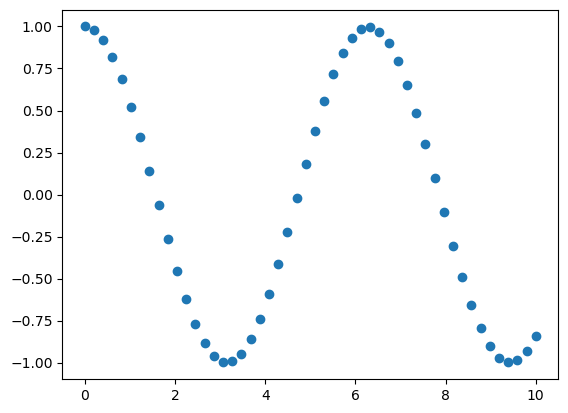

In [5]:
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

Our aim is to evaluate the cosine function at many points.

In [6]:
n = 50_000_000
x = np.linspace(0, 10, n)

### With NumPy

In [7]:
%%time 

y = np.cos(x)

CPU times: user 389 ms, sys: 22.1 ms, total: 411 ms
Wall time: 410 ms


In [8]:
%%time 

y = np.cos(x)

CPU times: user 387 ms, sys: 28.1 ms, total: 415 ms
Wall time: 414 ms


In [9]:
x = None  

### With JAX

In [10]:
x_jax = jnp.linspace(0, 10, n)

Let's time it.


In [11]:
%%time
    
y = jnp.cos(x_jax)
jax.block_until_ready(y);  # Don't run forward until the array is returned

CPU times: user 32.7 ms, sys: 1.94 ms, total: 34.6 ms
Wall time: 53.6 ms


In [12]:
%%time
    
y = jnp.cos(x_jax)
jax.block_until_ready(y); 

CPU times: user 1.35 ms, sys: 0 ns, total: 1.35 ms
Wall time: 1.06 ms


Here we change the input size --- can you explain why the timing changes?

In [13]:
x_jax = jnp.linspace(0, 10, n + 1)

In [14]:
%%time
    
y = jnp.cos(x_jax)
jax.block_until_ready(y);

CPU times: user 21 ms, sys: 2.01 ms, total: 23 ms
Wall time: 32.8 ms


In [15]:
%%time
    
y = jnp.cos(x_jax)
jax.block_until_ready(y);

CPU times: user 0 ns, sys: 832 μs, total: 832 μs
Wall time: 827 μs


In [16]:
x_jax = None  # Free memory

## Evaluating a more complicated function

In [17]:
def f(x):
    y = np.cos(2 * x**2) + np.sqrt(np.abs(x)) + 2 * np.sin(x**4) - 0.1 * x**2
    return y

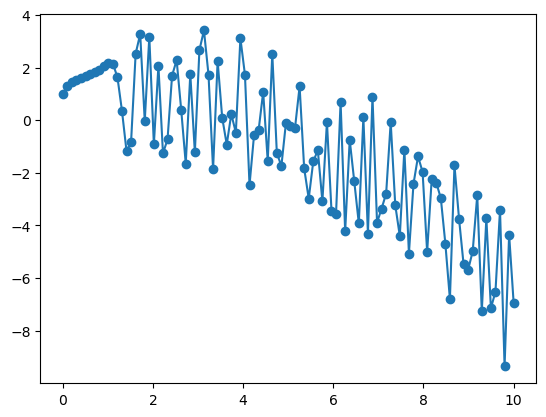

In [18]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 100)
ax.plot(x, f(x))
ax.scatter(x, f(x))
plt.show()

Now let's try with a large array.

### With NumPy

In [19]:
n = 50_000_000
x = np.linspace(0, 10, n)

In [20]:
%%time 

y = f(x)

CPU times: user 1.77 s, sys: 167 ms, total: 1.93 s
Wall time: 1.94 s


In [21]:
%%time 

y = f(x)

CPU times: user 1.76 s, sys: 174 ms, total: 1.93 s
Wall time: 1.93 s


### With JAX

In [22]:
def f(x):
    y = jnp.cos(2 * x**2) + jnp.sqrt(jnp.abs(x)) + 2 * jnp.sin(x**4) - x**2
    return y

In [23]:
x_jax = jnp.linspace(0, 10, n)

In [24]:
%%time 

y = f(x_jax)
jax.block_until_ready(y);

CPU times: user 151 ms, sys: 9.76 ms, total: 161 ms
Wall time: 229 ms


In [25]:
%%time 

y = f(x_jax)
jax.block_until_ready(y)

CPU times: user 1.28 ms, sys: 1.04 ms, total: 2.32 ms
Wall time: 8.41 ms


Array([  1.       ,   1.0004472,   1.0006324, ..., -96.95619  ,
       -96.96176  , -96.96176  ], dtype=float32)

### Compiling the Whole Function

In [26]:
f_jax = jax.jit(f)

In [27]:
%%time 

y = f_jax(x_jax)
jax.block_until_ready(y);

CPU times: user 71.2 ms, sys: 3.34 ms, total: 74.5 ms
Wall time: 105 ms


In [28]:
%%time 

y = f_jax(x_jax)
jax.block_until_ready(y);

CPU times: user 720 μs, sys: 0 ns, total: 720 μs
Wall time: 824 μs
